In [1]:
import pandas as pd

df = pd.read_csv("/content/Airplane_Crashes_and_Fatalities_Since_1908.csv")

df.head()


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [2]:
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")


The dataset has 5268 rows and 13 columns.


In [3]:
df.tail(75)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [13]:
df['Time'] = df['Time'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')
df['Operator'] = df['Operator'].fillna('Unknown')
df['Flight #'] = df['Flight #'].fillna('N/A')
df['Route'] = df['Route'].fillna('Unknown')
df['Type'] = df['Type'].fillna('Unknown')
df['Registration'] = df['Registration'].fillna('Unknown')
df['cn/In'] = df['cn/In'].fillna('Unknown')
df['Aboard'] = df['Aboard'].fillna(df['Aboard'].median())
df['Fatalities'] = df['Fatalities'].fillna(0)
df['Ground'] = df['Ground'].fillna(0)
df['Summary'] = df['Summary'].fillna('No summary available')

# Checks that no missing values remain
df.isnull().sum()


,0
Date,0
Time,0
Location,0
Operator,0
Flight #,0
Route,0
Type,0
Registration,0
cn/In,0
Aboard,0


In [6]:
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()
fatality_locations.head()


,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


In [7]:
max_fatalities = fatality_locations['Fatalities'].max()
max_fatal_date = fatality_locations.loc[fatality_locations['Fatalities'] == max_fatalities, 'Date']
print(f"The date(s) with the highest number of fatalities ({max_fatalities}) is/are:\n{max_fatal_date.values}")


The date(s) with the highest number of fatalities (583.0) is/are:
['03/27/1977']


In [8]:
no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0]
count_no_fatalities = len(no_fatalities)
print(f"There were {count_no_fatalities} crashes with no fatalities.")


There were 70 crashes with no fatalities.


In [10]:

fatality_locations.head()

fatality_locations[['Region', 'Country']] = fatality_locations['Location'].str.split(',', n=1, expand=True)

fatality_locations['Region'] = fatality_locations['Region'].str.strip()
fatality_locations['Country'] = fatality_locations['Country'].str.strip()

fatality_locations.head(10)



,Date,Location,Aboard,Fatalities,Region,Country
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0,Fort Myer,Virginia
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0,AtlantiCity,New Jersey
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0,Victoria,"British Columbia, Canada"
3,09/09/1913,Over the North Sea,20.0,14.0,Over the North Sea,None
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0,Near Johannisthal,Germany
5,03/05/1915,"Tienen, Belgium",41.0,21.0,Tienen,Belgium
6,09/03/1915,"Off Cuxhaven, Germany",19.0,19.0,Off Cuxhaven,Germany
7,07/28/1916,"Near Jambol, Bulgeria",20.0,20.0,Near Jambol,Bulgeria
8,09/24/1916,"Billericay, England",22.0,22.0,Billericay,England
9,10/01/1916,"Potters Bar, England",19.0,19.0,Potters Bar,England


In [11]:

fatality_sorted = fatality_locations.sort_values(by='Fatalities', ascending=False)

top_100 = fatality_sorted.head(100)

top_100.head(10)


,Date,Location,Aboard,Fatalities,Region,Country
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,Tenerife,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,Mt. Osutaka,"near Ueno Village, Japan"
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,Near Charkhidadri,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,Near Ermenonville,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,AtlantiOcean,110 miles West of Ireland
3240,08/19/1980,"Near Riyadh, Saudi Arabia",301.0,301.0,Near Riyadh,Saudi Arabia
3775,07/03/1988,"Over the Persian Gulf, near Bandar Abbas, Iran",290.0,290.0,Over the Persian Gulf,"near Bandar Abbas, Iran"
4916,02/19/2003,"Near Shahdad, Iran",275.0,275.0,Near Shahdad,Iran
3137,05/25/1979,"Chicago O'Hare, Illinois",271.0,271.0,Chicago O'Hare,Illinois
3436,09/01/1983,"Near Sakhalin Island, Russia",269.0,269.0,Near Sakhalin Island,Russia


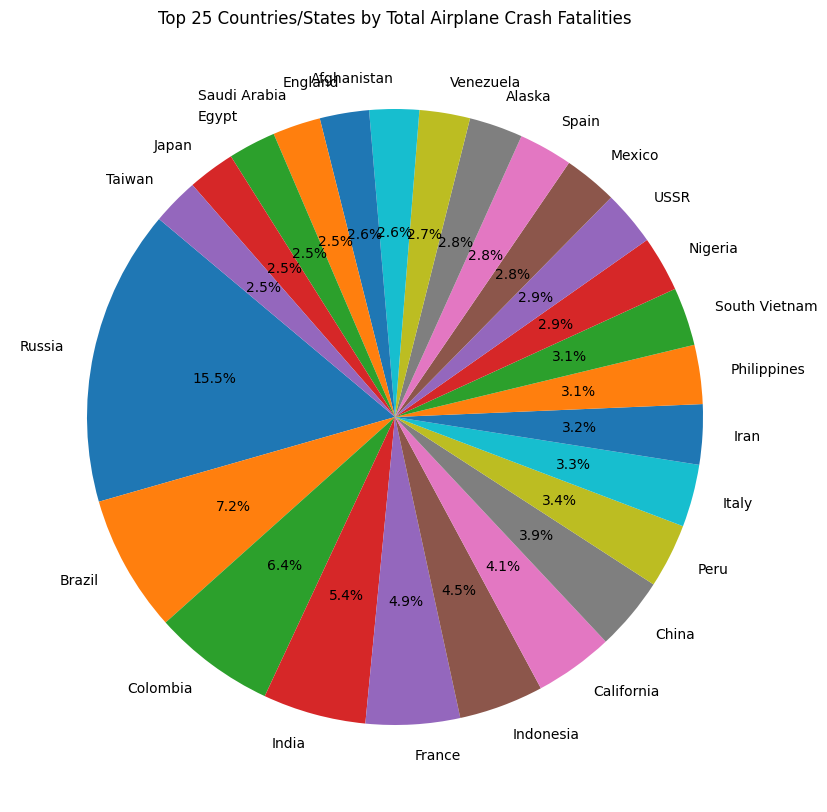

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

country_fatalities = fatality_locations.groupby('Country')['Fatalities'].sum()

top_25 = country_fatalities.nlargest(25)
#pie chart
plt.figure(figsize=(10,10))
plt.pie(top_25, labels=top_25.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 25 Countries/States by Total Airplane Crash Fatalities')
plt.show()
